# 1. Single camera calibration using DLT w/ predefined points

**This script intends to calibrate a camera using an object.**\
It will use predefined world and image coordinates and then calculate the projective matrix using DLT transform and retrieve the geometric error.

**Import the libraries**

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp

## Direct Linear Transform
Estimates the 11 parameters of the uncalibrated camera

**Implementation:**

In [13]:
worldcoo = np.array([ (0,0,0), (0,28,0), (56,0,0), (56,28,0), (56,84,0), (84,84,0), (112,56,0),
             (112,84,0), (84,56,0), (84,112,0), (0,28,28), (0,28,56), (0,56,28), (0,56,56), 
             (0,56,84), (0,56,112), (0,112,0), (0,112,28), (0,112,56), (0,112,84), (0,112,112) 
           ])

imagecoo = np.array([ (1549, 1599), (1547, 1763), (1797, 1625), (1793, 1807), (1785, 2156), (1918, 2196),
             (2069, 2051), (2061, 2233), (1928, 2015), (1915, 2366), (1413, 1781), (1280, 1807),
             (1415, 1958), (1283, 1981), (1139, 2013), (990, 2041), (1541, 2251), (1420, 2287),
             (1292, 2320), (1149, 2356), (1005, 2401)
           ])


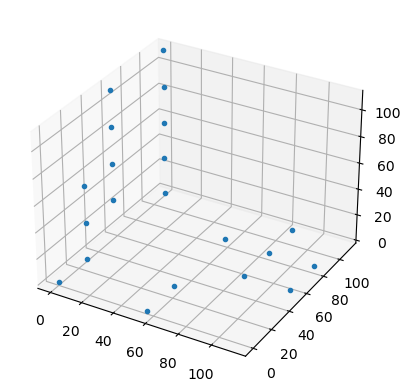

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
#ax.plot(0,0)
ax.plot(worldcoo[:,0],worldcoo[:,1],worldcoo[:,2], ls = "None", marker = ".")
plt.show()

### Homogenous coordinates transformation

In [15]:
# get the shape of the matrix
worldm, worldn = worldcoo.shape
imagem, imagen = imagecoo.shape

In [16]:
homo_world = np.append(worldcoo,np.ones((worldm,1)),axis = 1)

In [17]:
homo_image = np.append(imagecoo,np.ones((imagem,1)),axis = 1)

In [18]:
#3D DLT
A = []

for i in range(worldm):
    A = np.append(A,[-homo_world[i,0],-homo_world[i,1],-homo_world[i,2],-1,0,0,0,0,homo_image[i,0]*homo_world[i,0],homo_image[i,0]*homo_world[i,1],homo_image[i,0]*homo_world[i,2],homo_image[i,0]])
    A = np.append(A,[0,0,0,0,-homo_world[i,0],-homo_world[i,1],-homo_world[i,2],-1,homo_image[i,1]*homo_world[i,0],homo_image[i,1]*homo_world[i,1],homo_image[i,1]*homo_world[i,2],homo_image[i,1]])

#A = np.append(Ax,Ay,axis = 0)

### SVD(Singular Value Decomposition)
Solving a system of linear equations of the form Ax = 0 is equivalent to finding the null space of A. Thus, we can apply the SVD to solve Mp = 0 

In [19]:
# pass the list A as an array
A = np.asarray(A).reshape(worldm*2,12)
#print(A)
print(A.shape)

(42, 12)


In [20]:
# SVD 
U, S, Vh = np.linalg.svd(A)

# normalize
L = Vh[-1,:] / Vh[-1,-2]
#Camera projection matrix:
PEst = L.reshape(3,3+1)
print(PEst)

[[-2.27845939e+03 -6.69917113e+02  5.87985094e+03 -1.48596638e+06]
 [ 1.29447712e+03 -6.64905155e+03  1.06577431e+03 -1.53244204e+06]
 [ 1.13819050e+00 -4.47515509e-01  1.00000000e+00 -9.61469313e+02]]


### Expected image coordinate values

In [21]:
xEst = np.zeros((worldm,3))

for j in range(worldm):
    xEst[j,:]  = np.dot(PEst,homo_world[j])
    xEst[j,:] /= xEst[j,2]                      # to inhomogeneous


### Geometric Error

In [22]:
err_list = np.sqrt(np.mean(np.sum(np.square(imagecoo-xEst[:,:2]), 1)))
print("Geometric error:",err_list)


Geometric error: 2.858430148343255


The error obtained is considerably high. This can be due to the predefined world and image points. Also, not normalizing can affect the overall performance of the calibration. Besides, this points were not created by using a projection matrix, that can correlate a world point to a image point by using a specific camera matrix.